# Apple Jackfruit Dataset

Dataset Credits:
- Fruits Detection > Fruits-Apple-v1
  - https://universe.roboflow.com/ron-xmba6/fruits-detection-hrhn3
- Jackfruit > 2023-04-10 11:58am
  - https://universe.roboflow.com/vietnam-fruit-in-lab/jackfruit-maj1o


 Dataset can be accessed here: https://iitgnacin-my.sharepoint.com/:u:/g/personal/22110103_iitgn_ac_in/ETOx7WAgqltAuhVpPSBEMaYB3ckKLDtF4t0s5Bxd3CLX5A?e=teupL5
## VGG 1

In [1]:
# Loading the dataset

import zipfile
with zipfile.ZipFile("Dataset.zip","r") as zip_ref:
    zip_ref.extractall("FinalDS")

In [2]:
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG model with one block
def create_vgg1_model():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layer
    x = Dense(128, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
vgg_model_1_block = create_vgg1_model()

# Compile the model
vgg_model_1_block.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model_1_block.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 802816)            0         
                                                                 
 dense (Dense)               (None, 128)               102760

In [4]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = vgg_model_1_block.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 31s 1s/step - loss: 10.6861 - accuracy: 0.7688 - val_loss: 8.0945e-18 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 27s 1s/step - loss: 0.3558 - accuracy: 0.9812 - val_loss: 0.4075 - val_accuracy: 0.9750
Epoch 3/5
20/20 [==============================] - 27s 1s/step - loss: 0.1722 - accuracy: 0.9875 - val_loss: 1.2899e-05 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 27s 1s/step - loss: 1.7361e-09 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 0.9750
Epoch 5/5
20/20 [==============================] - 27s 1s/step - loss: 7.0398e-07 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9750
Time taken: 167.27846240997314 seconds


Text(0.5, 0, 'Epoch')

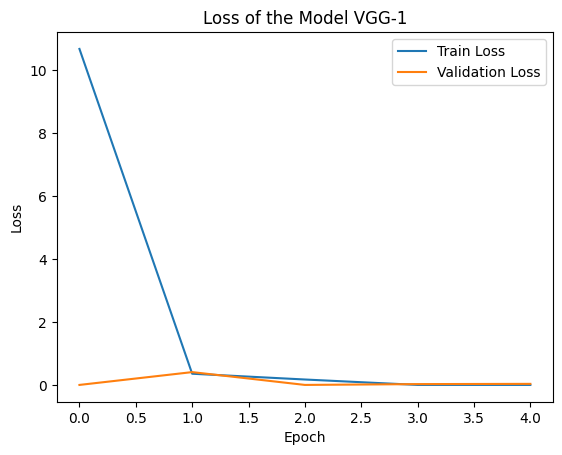

In [5]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-1')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

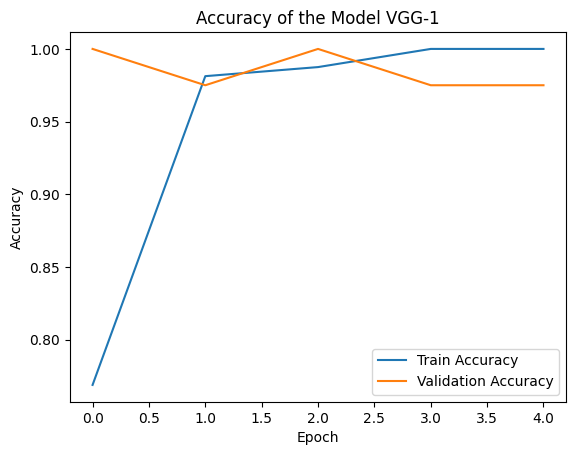

In [6]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [7]:
print("The Training Loss for the Model VGG 1")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 1")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 1")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 1")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 1
Epoch 1: 10.686086654663086
Epoch 2: 0.35581710934638977
Epoch 3: 0.17224274575710297
Epoch 4: 1.7360534121380056e-09
Epoch 5: 7.039812999209971e-07
The Validation Loss for the Model VGG 1
Epoch 1: 8.09454049307955e-18
Epoch 2: 0.40745148062705994
Epoch 3: 1.2898523891635705e-05
Epoch 4: 0.025978121906518936
Epoch 5: 0.03383050858974457
The Training Accuracy for the Model VGG 1
Epoch 1: 0.768750011920929
Epoch 2: 0.981249988079071
Epoch 3: 0.987500011920929
Epoch 4: 1.0
Epoch 5: 1.0
The Validation Accuracy for the Model VGG 1
Epoch 1: 1.0
Epoch 2: 0.9750000238418579
Epoch 3: 1.0
Epoch 4: 0.9750000238418579
Epoch 5: 0.9750000238418579


In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_1_block.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 1s 129ms/step - loss: 0.0338 - accuracy: 0.9750
Test loss: 0.0338, Test accuracy: 0.9750


# VGG 3

In [9]:
# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG model with three blocks
def create_vgg_model_3_blocks():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layer
    x = Dense(128, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model with three blocks
vgg_model_3_blocks = create_vgg_model_3_blocks()

# Compile the model
vgg_model_3_blocks.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model_3_blocks.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 56, 128)       0   

In [10]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = vgg_model_3_blocks.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 31s 1s/step - loss: 0.8853 - accuracy: 0.8313 - val_loss: 0.0709 - val_accuracy: 0.9750
Epoch 2/5
20/20 [==============================] - 29s 1s/step - loss: 0.1219 - accuracy: 0.9625 - val_loss: 0.1796 - val_accuracy: 0.9500
Epoch 3/5
20/20 [==============================] - 29s 1s/step - loss: 0.0261 - accuracy: 0.9875 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 30s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 30s 1s/step - loss: 8.8180e-04 - accuracy: 1.0000 - val_loss: 4.7194e-05 - val_accuracy: 1.0000
Time taken: 171.3043749332428 seconds


Text(0.5, 0, 'Epoch')

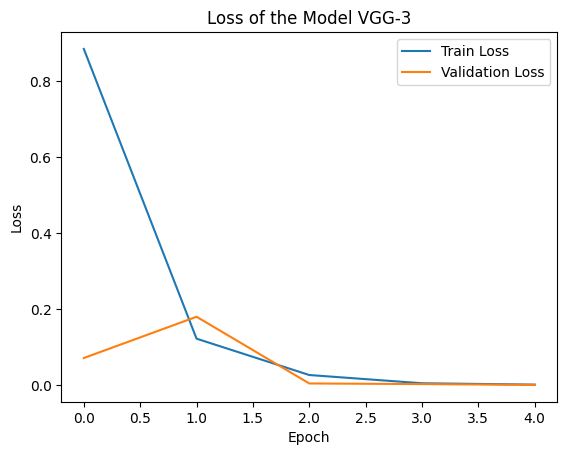

In [11]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-3')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

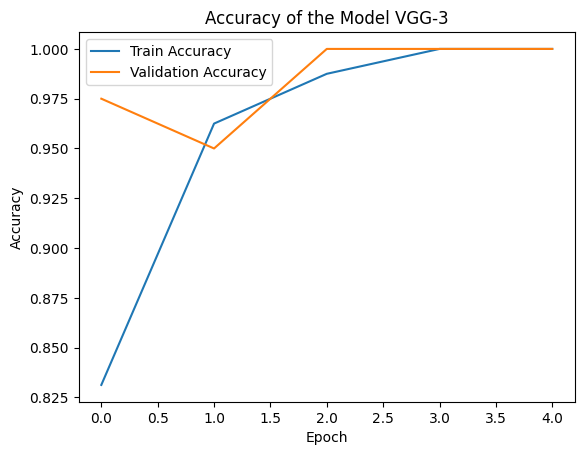

In [12]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [13]:
print("The Training Loss for the Model VGG 3")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 3")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 3")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 3")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 3
Epoch 1: 0.8853145837783813
Epoch 2: 0.1218934878706932
Epoch 3: 0.026141280308365822
Epoch 4: 0.004421890713274479
Epoch 5: 0.0008817990310490131
The Validation Loss for the Model VGG 3
Epoch 1: 0.07090979069471359
Epoch 2: 0.17964792251586914
Epoch 3: 0.00391561072319746
Epoch 4: 0.00225069303996861
Epoch 5: 4.7193971113301814e-05
The Training Accuracy for the Model VGG 3
Epoch 1: 0.831250011920929
Epoch 2: 0.9624999761581421
Epoch 3: 0.987500011920929
Epoch 4: 1.0
Epoch 5: 1.0
The Validation Accuracy for the Model VGG 3
Epoch 1: 0.9750000238418579
Epoch 2: 0.949999988079071
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [14]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_3_blocks.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 2s 371ms/step - loss: 4.7194e-05 - accuracy: 1.0000
Test loss: 0.0000, Test accuracy: 1.0000


## Same VGG 3 Model with Data Augmentation

Data Augmented with:

  - rotation_range=90
  - width_shift_range=0.75
  - height_shift_range=0.75
  - shear_range=0.95
  - zoom_range=0.3
  - horizontal_flip=True
  - channel_shift_range=0.6
  - fill_mode='nearest'


In [15]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data augmentation for training data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.75,
    height_shift_range=0.75,
    shear_range=0.95,
    zoom_range=0.3,
    horizontal_flip=True,
    channel_shift_range=0.6,
    fill_mode='nearest'
)

# Define data generator for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load augmented training data
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model with augmented data
history_augmented = vgg_model_3_blocks.fit(
    train_generator_augmented,
    steps_per_epoch=len(train_generator_augmented),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 46s 2s/step - loss: 0.7534 - accuracy: 0.8125 - val_loss: 0.1461 - val_accuracy: 0.9250
Epoch 2/5
20/20 [==============================] - 30s 1s/step - loss: 0.1557 - accuracy: 0.9688 - val_loss: 0.4240 - val_accuracy: 0.9000
Epoch 3/5
20/20 [==============================] - 30s 1s/step - loss: 0.4726 - accuracy: 0.9312 - val_loss: 0.2477 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 30s 2s/step - loss: 0.1586 - accuracy: 0.9625 - val_loss: 5.7805e-04 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 30s 2s/step - loss: 0.2207 - accuracy: 0.9500 - val_loss: 0.0260 - val_accuracy: 1.0000


Text(0.5, 0, 'Epoch')

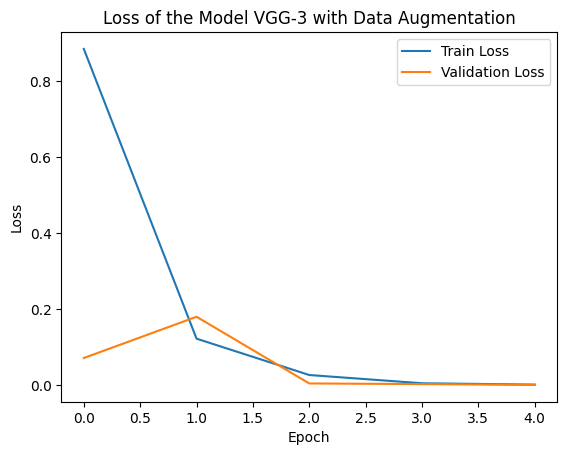

In [16]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-3 with Data Augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

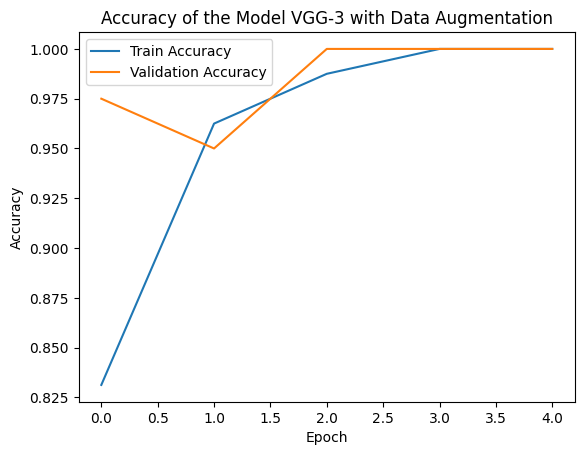

In [17]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-3 with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [18]:
print("The Training Loss for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 3 with Data Augmentation")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 3 with Data Augmentation
Epoch 1: 0.8853145837783813
Epoch 2: 0.1218934878706932
Epoch 3: 0.026141280308365822
Epoch 4: 0.004421890713274479
Epoch 5: 0.0008817990310490131
The Validation Loss for the Model VGG 3 with Data Augmentation
Epoch 1: 0.07090979069471359
Epoch 2: 0.17964792251586914
Epoch 3: 0.00391561072319746
Epoch 4: 0.00225069303996861
Epoch 5: 4.7193971113301814e-05
The Training Accuracy for the Model VGG 3 with Data Augmentation
Epoch 1: 0.831250011920929
Epoch 2: 0.9624999761581421
Epoch 3: 0.987500011920929
Epoch 4: 1.0
Epoch 5: 1.0
The Validation Accuracy for the Model VGG 3 with Data Augmentation
Epoch 1: 0.9750000238418579
Epoch 2: 0.949999988079071
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [19]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg_model_3_blocks.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 2s 379ms/step - loss: 0.0260 - accuracy: 1.0000
Test loss: 0.0260, Test accuracy: 1.0000


## VGG 16 with all layers trained

In [20]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)

# Define VGG-16 model
def create_vgg16_model():
    # Input layer
    inputs = Input(shape=input_shape)

    # Resize input to target shape
    resized_inputs = tf.image.resize(inputs, target_shape[:2])

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(resized_inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Fully connected layers
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)

    # Output layer (binary classification)
    outputs = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the VGG-16 model
vgg16_model = create_vgg16_model()

# Compile the model
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
vgg16_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 640, 640, 3)]     0         
                                                                 
 tf.image.resize_2 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     7385

In [21]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = vgg16_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 189s 9s/step - loss: 1.0524 - accuracy: 0.4750 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 185s 9s/step - loss: 0.7061 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 193s 10s/step - loss: 0.6942 - accuracy: 0.4625 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 185s 9s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 183s 9s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Time taken: 980.4492321014404 seconds


Text(0.5, 0, 'Epoch')

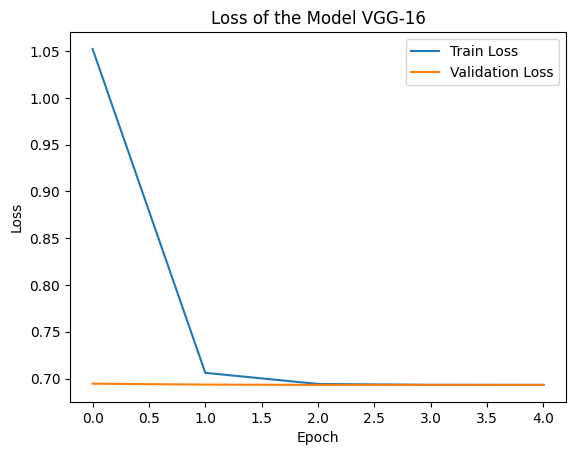

In [22]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-16')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

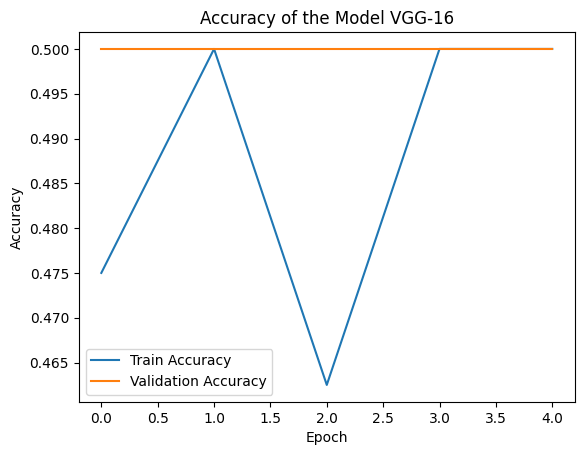

In [23]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [24]:
print("The Training Loss for the Model VGG 16")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 16")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 16")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 16")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 16
Epoch 1: 1.0524311065673828
Epoch 2: 0.70609050989151
Epoch 3: 0.6941578388214111
Epoch 4: 0.6932703256607056
Epoch 5: 0.693202018737793
The Validation Loss for the Model VGG 16
Epoch 1: 0.6944633722305298
Epoch 2: 0.6935080289840698
Epoch 3: 0.6931561231613159
Epoch 4: 0.6931565403938293
Epoch 5: 0.693149983882904
The Training Accuracy for the Model VGG 16
Epoch 1: 0.4749999940395355
Epoch 2: 0.5
Epoch 3: 0.4625000059604645
Epoch 4: 0.5
Epoch 5: 0.5
The Validation Accuracy for the Model VGG 16
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5


In [25]:
# Evaluate the model on test data
test_loss, test_accuracy = vgg16_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 11s 2s/step - loss: 0.6931 - accuracy: 0.5000
Test loss: 0.6931, Test accuracy: 0.5000


## Transfer learning using VGG16 with tuning only final MLP layers

In [26]:
def create_transfer_model(input_shape, num_classes):

    # Load pre-trained VGG-16 model (excluding top layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze convolutional layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom MLP layers on top
    x = base_model.output
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    # Create transfer learning model
    transfer_model = Model(inputs=base_model.input, outputs=predictions)
    return transfer_model

input_shape = (224, 224, 3)
num_classes = 1  # Binary classification
transfer_model = create_transfer_model(input_shape, num_classes)

# Compile the model
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
transfer_model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [27]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = transfer_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 90s 4s/step - loss: 5.8266 - accuracy: 0.7688 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 76s 4s/step - loss: 0.2418 - accuracy: 0.9625 - val_loss: 2.3389e-05 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 78s 4s/step - loss: 0.1110 - accuracy: 0.9812 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 79s 4s/step - loss: 0.0667 - accuracy: 0.9688 - val_loss: 2.5087e-05 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 77s 4s/step - loss: 0.0303 - accuracy: 0.9937 - val_loss: 2.5948e-05 - val_accuracy: 1.0000
Time taken: 414.14637565612793 seconds


Text(0.5, 0, 'Epoch')

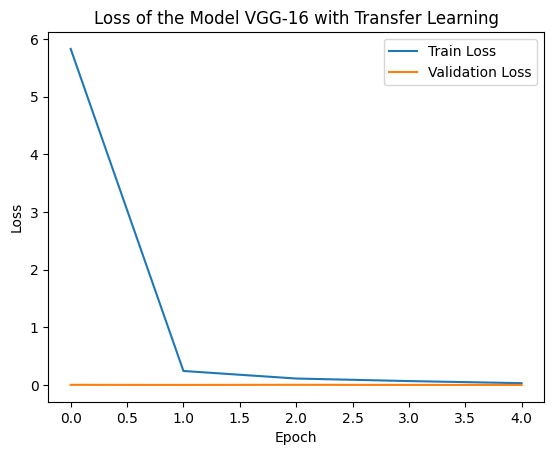

In [28]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model VGG-16 with Transfer Learning')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

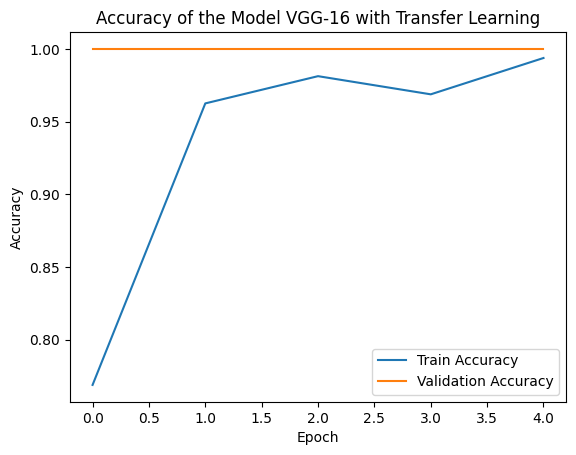

In [29]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model VGG-16 with Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [30]:
print("The Training Loss for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the Model VGG 16 with Transfer Learning")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the Model VGG 16 with Transfer Learning
Epoch 1: 5.82661247253418
Epoch 2: 0.24181747436523438
Epoch 3: 0.11098217964172363
Epoch 4: 0.06672485172748566
Epoch 5: 0.030341992154717445
The Validation Loss for the Model VGG 16 with Transfer Learning
Epoch 1: 0.0015334885101765394
Epoch 2: 2.338852937100455e-05
Epoch 3: 0.0020128206815570593
Epoch 4: 2.5087461835937575e-05
Epoch 5: 2.594793841126375e-05
The Training Accuracy for the Model VGG 16 with Transfer Learning
Epoch 1: 0.768750011920929
Epoch 2: 0.9624999761581421
Epoch 3: 0.981249988079071
Epoch 4: 0.96875
Epoch 5: 0.9937499761581421
The Validation Accuracy for the Model VGG 16 with Transfer Learning
Epoch 1: 1.0
Epoch 2: 1.0
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0


In [31]:
# Evaluate the model on test data
test_loss, test_accuracy = transfer_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 11s 2s/step - loss: 2.5948e-05 - accuracy: 1.0000
Test loss: 0.0000, Test accuracy: 1.0000
